# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
from coinmarketcap_draw import coinmarketcap_data

Go ahead and create a `Share` object as follows:

In [48]:
coin_name = '0x'
data = coinmarketcap_data(coin_name)

In [49]:
share = bb.Share("123",'123',data=data)

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/entity/share.py:174: UserWarning: Environment variable BULBEA_QUANDL_API_KEY for Quandl hasn't been set. A maximum of 50000 calls per day can be made. Visit https://www.quandl.com to get your API key.
  warnings.warn(message)


By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [50]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,market_cap,price_btc,price_usd,volume_usd,volume_token,Close
time,,,,,,
2017-12-03 14:34:32,105103000.0,0.000018,0.210206,4538470.0,2.159058e+07,0.210206
2017-12-03 16:34:33,107619500.0,0.000018,0.215239,4820300.0,2.239510e+07,0.215239
2017-12-03 18:34:34,108378500.0,0.000019,0.216757,4461260.0,2.058185e+07,0.216757
2017-12-03 20:34:33,109307500.0,0.000019,0.218615,4404230.0,2.014606e+07,0.218615
2017-12-03 20:54:36,106573500.0,0.000019,0.213147,4293030.0,2.014117e+07,0.213147


In order to analyse a given attribute, you could plot the same as follows:

In [51]:
figsize = (20, 15)

% matplotlib inline

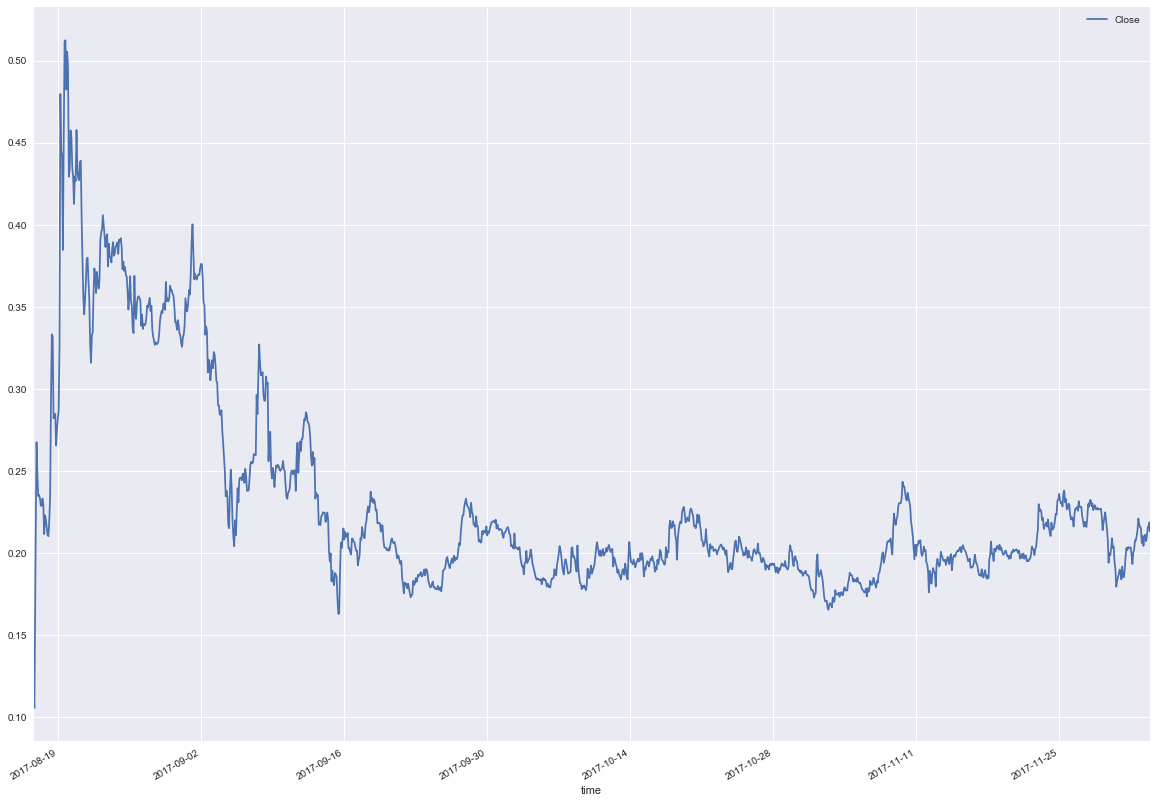

In [52]:
share.plot(figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

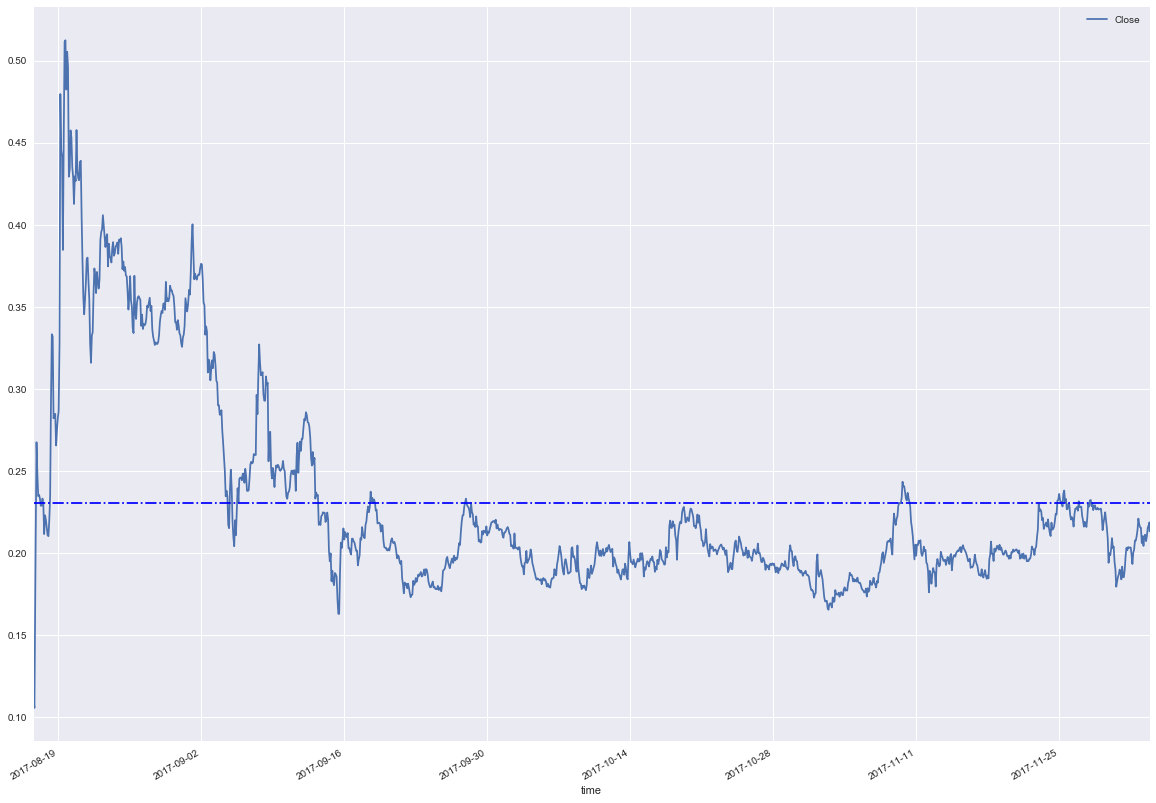

In [53]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [54]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
time,,,
2017-12-03 14:34:32,0.179817,0.201819,0.223821
2017-12-03 16:34:33,0.180281,0.201629,0.222976
2017-12-03 18:34:34,0.180415,0.201568,0.222720
2017-12-03 20:34:33,0.180281,0.201637,0.222994
2017-12-03 20:54:36,0.180214,0.201725,0.223236


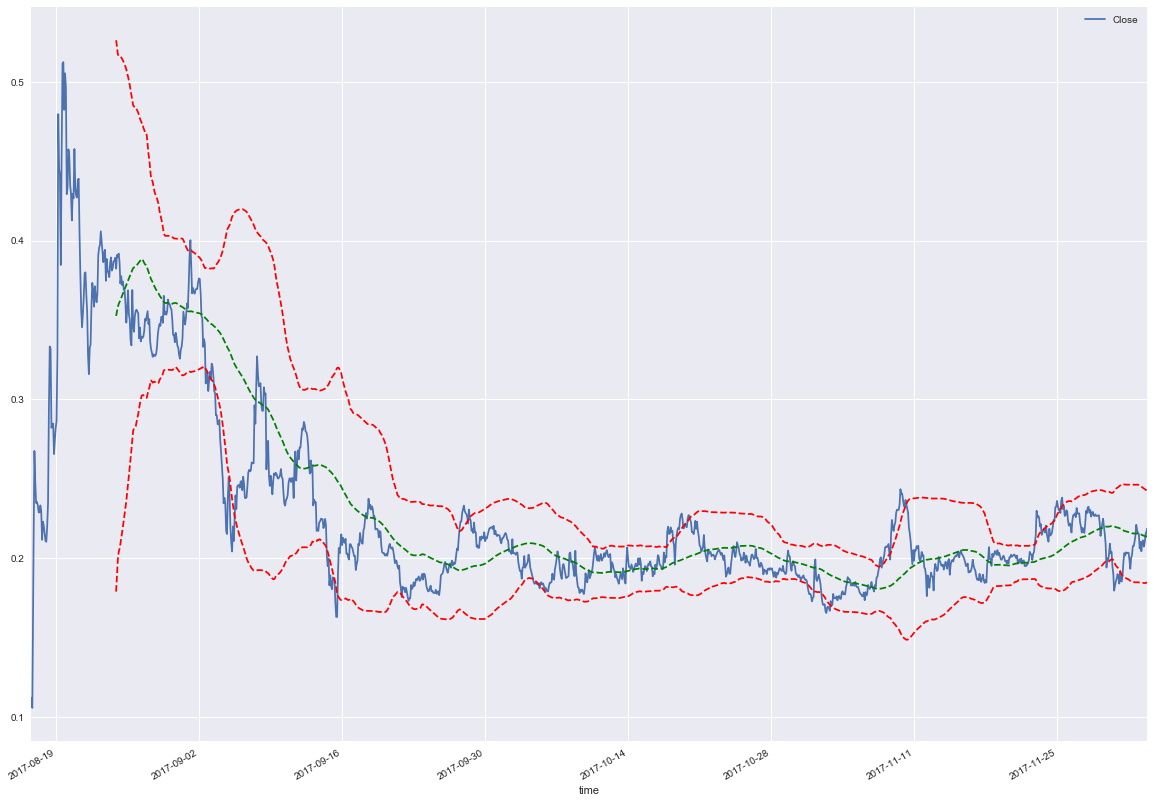

In [55]:
share.plot(['Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [56]:
from bulbea.learn.evaluation import split

In [90]:
Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True, train=0.01)

In [91]:
import numpy as np
Xtrain  = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

### Modelling

In [92]:
from bulbea.learn.models import RNN

In [93]:
rnn = RNN([1, 100, 100, 1]) # number of neurons in each layer

/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:29: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  return_sequences = True
/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:29: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=100)`
  return_sequences = True
/Users/geleichen/Desktop/NewBillions/bloomberg_crypto/lstm_research/gelei_bulbea/bulbea/learn/models/ann.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  self.model.add(core.Dense(output_dim = sizes[-1]))


#### TRAINING

In [94]:
rnn.fit(Xtrain, ytrain)

Epoch 1/10
13/13 [==============================] - 1s - loss: 0.2037
Epoch 2/10
13/13 [==============================] - 0s - loss: 0.1046
Epoch 3/10
13/13 [==============================] - 0s - loss: 0.0457
Epoch 4/10
13/13 [==============================] - 0s - loss: 0.0467
Epoch 5/10
13/13 [==============================] - 0s - loss: 0.0530
Epoch 6/10
13/13 [==============================] - 0s - loss: 0.0356
Epoch 7/10
13/13 [==============================] - 0s - loss: 0.0376
Epoch 8/10
13/13 [==============================] - 0s - loss: 0.0386
Epoch 9/10
13/13 [==============================] - 0s - loss: 0.0344
Epoch 10/10
13/13 [==============================] - 0s - loss: 0.0361


#### TESTING

In [95]:
predicted = rnn.predict(Xtest)

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
sqr_err = mean_squared_error(ytest, predicted)
print(sqr_err)

0.0215279565919


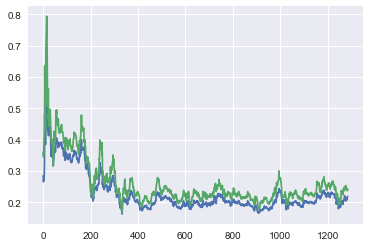

In [98]:
import matplotlib.pyplot as pplt
from bulbea.entity.share import _reverse_cummulative_return

_,_,_,ori_ytest = split(share, 'Close', normalize = False, train = 0.01)

new_pre = []
for x in range(0,len(ori_ytest)):
    t = ori_ytest[x]
    predict = predicted[x]
    new_pre.append(_reverse_cummulative_return(t,predict))

pplt.plot(ori_ytest)
pplt.plot(new_pre)
pplt.show()

In [99]:
data.tail(5)

,market_cap,price_btc,price_usd,volume_usd,volume_token,Close
time,,,,,,
2017-12-03 14:34:32,105103000.0,0.000018,0.210206,4538470.0,2.159058e+07,0.210206
2017-12-03 16:34:33,107619500.0,0.000018,0.215239,4820300.0,2.239510e+07,0.215239
2017-12-03 18:34:34,108378500.0,0.000019,0.216757,4461260.0,2.058185e+07,0.216757
2017-12-03 20:34:33,109307500.0,0.000019,0.218615,4404230.0,2.014606e+07,0.218615
2017-12-03 20:54:36,106573500.0,0.000019,0.213147,4293030.0,2.014117e+07,0.213147


In [100]:
_, Xtest, _, ytest = split(share, 'Close', normalize = True, train = 0.0)
_,ori_Xtest,_,ori_ytest = split(share, 'Close', normalize = False, train = 0.0)
Xtest  = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [101]:
predicted = rnn.predict(Xtest)

In [102]:
mean_squared_error(ytest, predicted)

0.021666541921473246

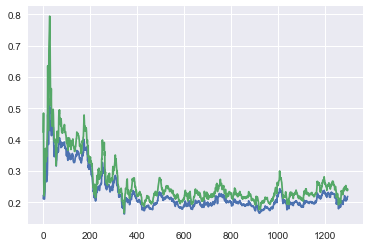

In [103]:
new_pre = []
for x in range(0,len(ori_ytest)):
    t = ori_ytest[x]
    predict = predicted[x]
    new_pre.append(_reverse_cummulative_return(t,predict))

pplt.plot(ori_ytest)
pplt.plot(new_pre)
pplt.show()

In [104]:
print(ori_Xtest[-1])

[ 0.217506  0.215635  0.21535   0.206022  0.210213  0.204265  0.210196
  0.211108  0.207169  0.210206  0.215239  0.216757]


In [105]:
from datetime import datetime
rnn.model.save("models/{}_{}_{}.h5".format(coin_name,sqr_err,datetime.utcnow().strftime('%Y_%b_%d_%H_%M')))